<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# PG DS - NLP Project- Amazon reviews analysis for a leading phone brand
## Submit By- Pradip Bera

### Problem Statement: 
A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.


### Steps perform as below:
    
    Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

1.	Read the .csv file using Pandas. Take a look at the top few records.
2.	Normalize casings for the review text and extract the text into a list for easier manipulation.
3.	Tokenize the reviews using NLTKs word_tokenize function.
4.	Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
5.	For the topic model, we should  want to include only nouns, find out all the POS tags that correspond to nouns.
1.	Limit the data to only terms with these tags.
0.	Apply Lemmatize function to different forms of the terms to treated as one.
1.	No need to provide POS tag to lemmatizer for now.
7.	Remove stopwords and punctuation (if there are any). 
8.	Create a topic model using LDA on the cleaned-up data with 12 topics.
0.	Print out the top terms for each topic.
1.	What is the coherence of the model with the c_v metric?
9.	Analyze the topics through the business lens.
0.	Determine which of the topics can be combined.
10.	Create topic model using LDA with what you think is the optimal number of topics
0.	What is the coherence of the model?
11.	The business should  be able to interpret the topics.
0.	Name each of the identified topics.
1.	Create a table with the topic name and the top 10 terms in each to present to the  business.


In [1]:
#Import Important Libraries

import numpy as np
import pandas as pd

In [2]:
#nltk library for tokenization, lemmatizer, stopwords, pos tags and Frequency Distribution
#import string for punctuation and str manipulations 

import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
import string

In [7]:
#!pip install pyLDAvis

In [4]:
#Gensim library for LDA model creation . Corpora in gensim to create the id2word Dictionary and corpus of terms
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [8]:
#visualization using matplotlib and pyLDAvis for the LDA model viz
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

In [12]:
pwd()

'C:\\Users\\pradi\\OneDrive\\Desktop\\NLP Project'

In [11]:
#import dataset
reviews_df = pd.read_csv("C:\\Users\\pradi\\OneDrive\\Desktop\\NLP Project\\K8 Reviews v0.2.csv")

In [14]:
reviews_df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [15]:
# Normalize casings for the review text and extract the text into a list for easier manipulation.
review_list = [review.lower() for review in reviews_df["review"]]
review_list[:5]

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon']

In [16]:
# Tokenize the reviews using NLTKs word_tokenize function.
rev_words = [word_tokenize(review) for review in review_list]
print(rev_words[:5])

[['good', 'but', 'need', 'updates', 'and', 'improvements'], ['worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.'], ['when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '....', 'its', 'already', '15', 'january', '..'], ['good'], ['the', 'worst', 'phone', 'everthe

In [17]:
# Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
pos_tagged_review = [pos_tag(review) for review in rev_words]
print(len(pos_tagged_review))

14675


In [18]:
print(pos_tagged_review[:5])

[[('good', 'JJ'), ('but', 'CC'), ('need', 'VBP'), ('updates', 'NNS'), ('and', 'CC'), ('improvements', 'NNS')], [('worst', 'JJS'), ('mobile', 'NN'), ('i', 'NN'), ('have', 'VBP'), ('bought', 'VBN'), ('ever', 'RB'), (',', ','), ('battery', 'NN'), ('is', 'VBZ'), ('draining', 'VBG'), ('like', 'IN'), ('hell', 'NN'), (',', ','), ('backup', 'NN'), ('is', 'VBZ'), ('only', 'RB'), ('6', 'CD'), ('to', 'TO'), ('7', 'CD'), ('hours', 'NNS'), ('with', 'IN'), ('internet', 'JJ'), ('uses', 'NNS'), (',', ','), ('even', 'RB'), ('if', 'IN'), ('i', 'JJ'), ('put', 'VBP'), ('mobile', 'JJ'), ('idle', 'NN'), ('its', 'PRP$'), ('getting', 'VBG'), ('discharged.this', 'NN'), ('is', 'VBZ'), ('biggest', 'JJS'), ('lie', 'NN'), ('from', 'IN'), ('amazon', 'NN'), ('&', 'CC'), ('lenove', 'NN'), ('which', 'WDT'), ('is', 'VBZ'), ('not', 'RB'), ('at', 'IN'), ('all', 'DT'), ('expected', 'VBN'), (',', ','), ('they', 'PRP'), ('are', 'VBP'), ('making', 'VBG'), ('full', 'JJ'), ('by', 'IN'), ('saying', 'VBG'), ('that', 'DT'), ('bat

In [21]:
#Find out all the POS tags that correspond to nouns - Since pos_tag function in NLTK library uses the Penn Treebank tagset.
#Check the help module for noun tag details which gives 4 tags - NN, NNP, NNPS and NNS
nltk.help.upenn_tagset(tagpattern='NN*')
pos_noun_reviews = []
for review in pos_tagged_review:
    nouns=[]
    for word_tuple in review:
        if "NN" in word_tuple[1]:
            nouns.append(word_tuple)
    pos_noun_reviews.append(nouns)

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [22]:
# nltk.download('tagsets')

In [24]:
print(pos_noun_reviews[:50])

[[('updates', 'NNS'), ('improvements', 'NNS')], [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('uses', 'NNS'), ('idle', 'NN'), ('discharged.this', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenove', 'NN'), ('battery', 'NN'), ('charger', 'NN'), ('hours', 'NNS'), ('don', 'NN')], [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')], [('phone', 'NN'), ('everthey', 'NN'), ('phone', 'NN'), ('problem', 'NN'), ('amazon', 'NN'), ('phone', 'NN'), ('amazon', 'NN')], [('camerawaste', 'NN'), ('money', 'NN')], [('phone', 'NN'), ('allot', 'NN'), ('..', 'NNP'), ('reason', 'NN'), ('k8', 'NNS')], [('battery', 'NN'), ('level', 'NN')], [('problems', 'NNS'), ('phone', 'NN'), ('hanging', 'NN'), ('problems', 'NNS'), ('note', 'NN'), ('station', 'NN'), ('ahmedabad', 'NN'), ('years', 'NNS'), ('phone', 'NN'), ('lenovo', 'NN')], [('lot', 'NN'), ('glitches', 'NNS'), ('thing', 'NN'), ('options', 'NNS')], [('wrost', 'NN')], [('phone', 'NN'), ('charger', 'NN

In [25]:
pos_noun_reviews=[review for review in pos_noun_reviews if len(review)>=1]
print(len(pos_noun_reviews), pos_noun_reviews[:50])

13487 [[('updates', 'NNS'), ('improvements', 'NNS')], [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('uses', 'NNS'), ('idle', 'NN'), ('discharged.this', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenove', 'NN'), ('battery', 'NN'), ('charger', 'NN'), ('hours', 'NNS'), ('don', 'NN')], [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')], [('phone', 'NN'), ('everthey', 'NN'), ('phone', 'NN'), ('problem', 'NN'), ('amazon', 'NN'), ('phone', 'NN'), ('amazon', 'NN')], [('camerawaste', 'NN'), ('money', 'NN')], [('phone', 'NN'), ('allot', 'NN'), ('..', 'NNP'), ('reason', 'NN'), ('k8', 'NNS')], [('battery', 'NN'), ('level', 'NN')], [('problems', 'NNS'), ('phone', 'NN'), ('hanging', 'NN'), ('problems', 'NNS'), ('note', 'NN'), ('station', 'NN'), ('ahmedabad', 'NN'), ('years', 'NNS'), ('phone', 'NN'), ('lenovo', 'NN')], [('lot', 'NN'), ('glitches', 'NNS'), ('thing', 'NN'), ('options', 'NNS')], [('wrost', 'NN')], [('phone', 'NN'), ('charger

In [26]:
# Lemmatize
wnl = WordNetLemmatizer()
lemmatized_words =[]
for review in pos_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(wnl.lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

In [28]:
print(lemmatized_words[:50])

[['update', 'improvement'], ['mobile', 'i', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'discharged.this', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour', 'don'], ['i', '%', 'cash', '..'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', '..', 'reason', 'k8'], ['battery', 'level'], ['problem', 'phone', 'hanging', 'problem', 'note', 'station', 'ahmedabad', 'year', 'phone', 'lenovo'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['phone', 'charger', 'damage', 'month'], ['item', 'battery', 'life'], ['i', 'battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'], ['phone', 'slim', 'battry', 'backup', 'screen'], ['headset'], ['time', 'i'], ['product', 'prize', 'range', 'specification', 'comparison', 'mobile', 'range', 'i', 'phone', 'seal', 'i', 'credit', 'card', 'i', '..', '..', 'deal', 'amazon', '..'], ['battery', '..', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem

In [29]:
tweet_tokenize = TweetTokenizer()

In [30]:
#Create list of stopwords with punctuations.Manually added token ['\s'] as this is usually seperated in tokenize
stop_words = stopwords.words("english")
stop_words = stop_words+list(string.punctuation)+["\'s"] 

In [31]:
filtered_rev_words=[]

In [32]:
for review in lemmatized_words:
    filter_words=[]
    for words in review:
        rev_words = []
        rev_words = tweet_tokenize.tokenize(words)
        for word in rev_words:
            if word not in stop_words:
                filter_words.append(word)
    filtered_rev_words.append(filter_words)
filtered_rev_words=[review for review in filtered_rev_words if len(review)>=1]
print(len(filtered_rev_words),filtered_rev_words[:100])

13453 [['update', 'improvement'], ['mobile', 'battery', 'hell', 'backup', 'hour', 'us', 'idle', 'discharged.this', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash', '..'], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'], ['camerawaste', 'money'], ['phone', 'allot', '..', 'reason', 'k8'], ['battery', 'level'], ['problem', 'phone', 'hanging', 'problem', 'note', 'station', 'ahmedabad', 'year', 'phone', 'lenovo'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['phone', 'charger', 'damage', 'month'], ['item', 'battery', 'life'], ['battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'], ['phone', 'slim', 'battry', 'backup', 'screen'], ['headset'], ['time'], ['product', 'prize', 'range', 'specification', 'comparison', 'mobile', 'range', 'phone', 'seal', 'credit', 'card', '..', '..', 'deal', 'amazon', '..'], ['battery', '..', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem', 'speaker', 'phone'], ['camera', 'speed

In [37]:
#Barplot to visualize the 100 most using FreqDist and barplots

list_of_words = [word for review in filtered_rev_words for word in review]
common_word_freq=FreqDist(list_of_words).most_common(100)
word_list = common_word_freq[::-1]


In [38]:
words,freq = [],[]

In [40]:
for word in word_list:
    words.append(word[0])
    freq.append(word[1])

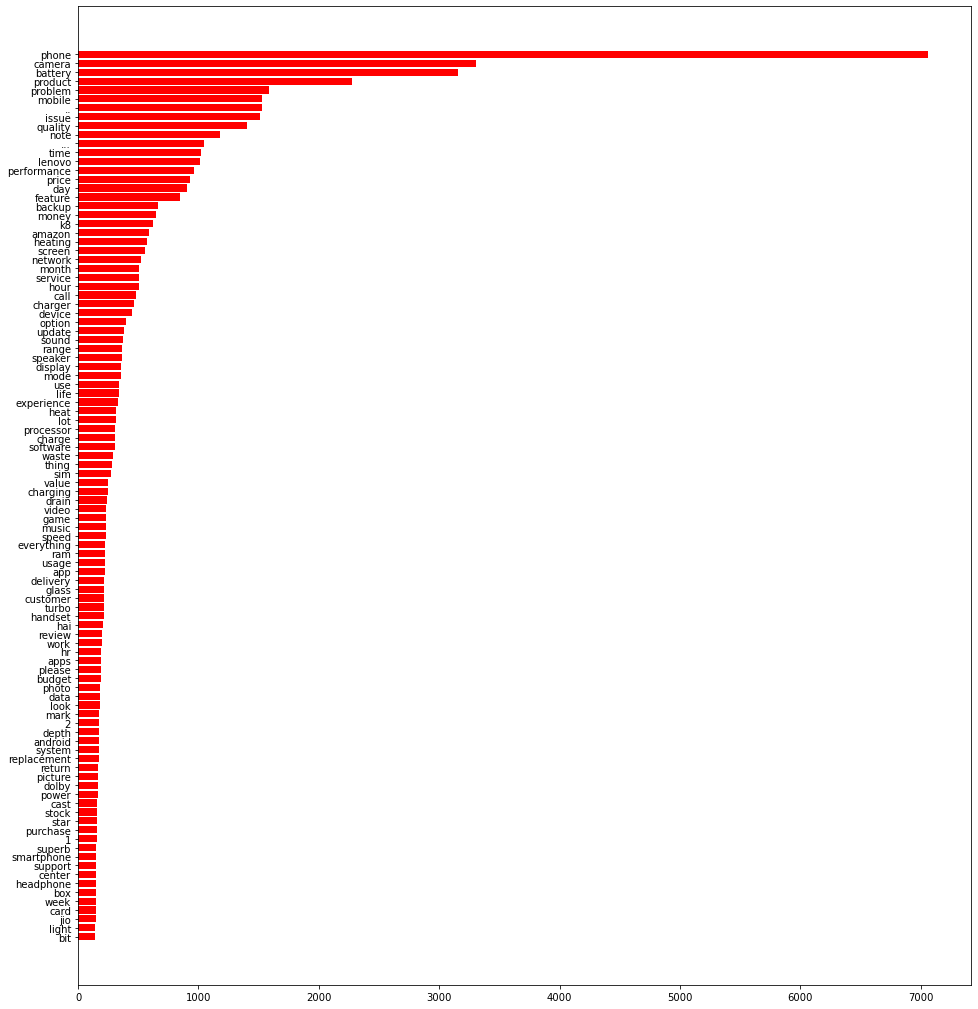

In [42]:
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(16,18))
plt.barh(x,y,color="Red")
plt.show()

In [43]:
print(common_word_freq)

[('phone', 7062), ('camera', 3303), ('battery', 3157), ('product', 2279), ('problem', 1589), ('mobile', 1530), ('..', 1527), ('issue', 1509), ('quality', 1404), ('note', 1177), ('...', 1047), ('time', 1019), ('lenovo', 1013), ('performance', 961), ('price', 931), ('day', 905), ('feature', 844), ('backup', 667), ('money', 644), ('k8', 626), ('amazon', 588), ('heating', 575), ('screen', 555), ('network', 519), ('month', 508), ('service', 508), ('hour', 506), ('call', 483), ('charger', 467), ('device', 449), ('option', 399), ('update', 385), ('sound', 369), ('range', 368), ('speaker', 366), ('display', 356), ('mode', 354), ('use', 344), ('life', 343), ('experience', 328), ('heat', 316), ('lot', 314), ('processor', 309), ('charge', 307), ('software', 303), ('waste', 289), ('thing', 282), ('sim', 270), ('value', 247), ('charging', 246), ('drain', 241), ('video', 233), ('game', 231), ('music', 230), ('speed', 228), ('everything', 226), ('ram', 224), ('usage', 222), ('app', 222), ('delivery',

From below list o/p we see that there are some punctuations that still appear in the word tokens like '..' and '...'
Also the list consists of emojis which are not relevant for topic modelling
Further there are also just numbers - e.g. '1' and '2' which are not relevant 
And we can also remove the obvious and contextual stop words from the topic modelling perspective 
Context Words like 'phone','lenovo','mobile','k8','product'.
Revising the stopwords based of above analysis

In [44]:
stop_words_inclusions = ["...","..",'phone','good','bad','lenovo','k8','note','product',
                         'mobile','hai','please','pls','star','hi','ho','ok','superb','handset']
stop_words = stop_words + stop_words_inclusions

isalnum() to remove emoji an isnumeric() to remove only number tokens present in the list 
len(word)!=1 will eliminate all one letter tokens such as 'u','i' etc.

In [45]:
final_rev_words = []
for review in filtered_rev_words:
    stopwords_removed_review=[]
    for word in review:
        if word not in stop_words and word.isalnum() and (not word.isnumeric()) and len(word)!=1: 
            stopwords_removed_review.append(word)
    final_rev_words.append(stopwords_removed_review)

In [46]:
# Clearing any reviews which are now empty lists after removal of revised stop words
final_rev_words=[review for review in final_rev_words if len(review)>=1]
print(len(final_rev_words),final_rev_words[:50])

11858 [['update', 'improvement'], ['battery', 'hell', 'backup', 'hour', 'us', 'idle', 'lie', 'amazon', 'lenove', 'battery', 'charger', 'hour'], ['cash'], ['everthey', 'problem', 'amazon', 'amazon'], ['camerawaste', 'money'], ['allot', 'reason'], ['battery', 'level'], ['problem', 'hanging', 'problem', 'station', 'ahmedabad', 'year'], ['lot', 'glitch', 'thing', 'option'], ['wrost'], ['charger', 'damage', 'month'], ['item', 'battery', 'life'], ['battery', 'problem', 'motherboard', 'problem', 'month', 'life'], ['slim', 'battry', 'backup', 'screen'], ['headset'], ['time'], ['prize', 'range', 'specification', 'comparison', 'range', 'seal', 'credit', 'card', 'deal', 'amazon'], ['battery', 'solution', 'battery', 'life'], ['smartphone'], ['galery', 'problem', 'speaker'], ['camera', 'battery'], ['camera', 'battery'], ['option', 'cast', 'screen', 'wifi', 'call', 'option', 'hotspot'], ['usb', 'cable'], ['price', 'display'], ['specification', 'function'], ['fon', 'fon', 'speekars'], ['issue', 'colo

In [47]:
# Barplot to visualize the 100 most common words using FreqDist and barplots
list_of_words = [word for review in final_rev_words for word in review]
word_freq=FreqDist(list_of_words).most_common(100)
word_list_2 = word_freq[::-1]

In [48]:
words,freq = [],[]
for word in word_list_2:
    words.append(word[0])
    freq.append(word[1])

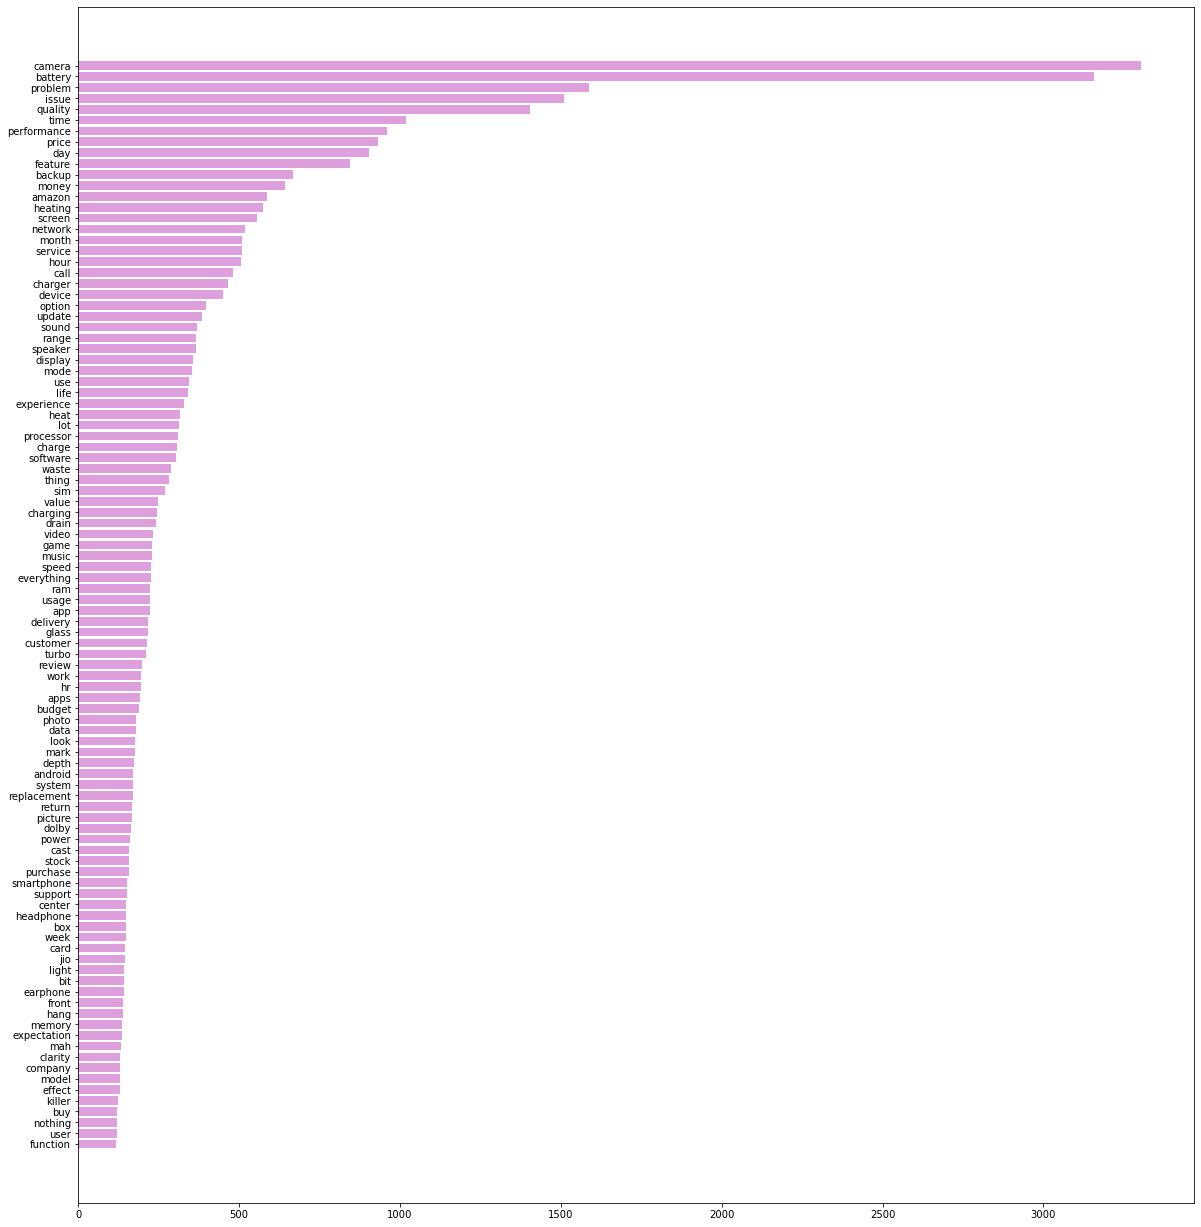

In [49]:
x=np.array(words)
y=np.array(freq)
plt.figure(figsize=(20,22))
plt.barh(x,y,color="plum")
plt.show()

In [50]:
# First creating the id2word Dictionary and corpus of words required for the LDA topic model

id2word = corpora.Dictionary(final_rev_words)

In [51]:
corpus =[] 
for review in final_rev_words:
    new = id2word.doc2bow(review)
    corpus.append(new)
    
print(corpus[:20],"\n")
print("No of reviews:",len(corpus),"\n")
print("No of unique words:",len(id2word),"\n")

[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1)], [(2, 2), (13, 1), (14, 1)], [(15, 1), (16, 1)], [(17, 1), (18, 1)], [(4, 1), (19, 1)], [(14, 2), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1)], [(5, 1), (29, 1), (30, 1)], [(4, 1), (31, 1), (32, 1)], [(4, 1), (14, 2), (30, 1), (32, 1), (33, 1)], [(3, 1), (34, 1), (35, 1), (36, 1)], [(37, 1)], [(38, 1)], [(2, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1)], [(4, 2), (32, 1), (47, 1)], [(48, 1)], [(14, 1), (49, 1), (50, 1)]] 

No of reviews: 11858 

No of unique words: 6341 



In [52]:
# Create a topic model using LDA on the cleaned-up data with 12 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")
lda_model.print_topics()

[(0,
  '0.157*"update" + 0.106*"waste" + 0.046*"smartphone" + 0.033*"bug" + 0.032*"hand" + 0.029*"function" + 0.029*"cost" + 0.028*"class" + 0.025*"connection" + 0.024*"mi"'),
 (1,
  '0.273*"camera" + 0.108*"quality" + 0.073*"day" + 0.030*"mode" + 0.028*"processor" + 0.027*"speaker" + 0.021*"use" + 0.021*"music" + 0.019*"usage" + 0.015*"thing"'),
 (2,
  '0.123*"amazon" + 0.080*"range" + 0.077*"software" + 0.042*"support" + 0.042*"mark" + 0.040*"game" + 0.039*"dolby" + 0.030*"refund" + 0.026*"power" + 0.026*"expectation"'),
 (3,
  '0.149*"screen" + 0.128*"device" + 0.089*"option" + 0.044*"sensor" + 0.041*"model" + 0.040*"user" + 0.034*"cast" + 0.028*"set" + 0.018*"someone" + 0.016*"interface"'),
 (4,
  '0.103*"charger" + 0.100*"heat" + 0.077*"charge" + 0.066*"lot" + 0.058*"bit" + 0.056*"turbo" + 0.048*"hr" + 0.046*"budget" + 0.042*"system" + 0.038*"slot"'),
 (5,
  '0.333*"issue" + 0.150*"money" + 0.069*"delivery" + 0.051*"value" + 0.038*"light" + 0.026*"application" + 0.025*"week" + 0.0

In [54]:
#Top terms for each topic.

topics=[]
topic_terms=[]
for idx in range(12):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=10):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)
    
for idx in range(12):
    print(idx,topic_terms[idx])
df_topics = pd.DataFrame(topic_terms).transpose()
df_topics.columns = topics

0 ['update', 'waste', 'smartphone', 'bug', 'hand', 'function', 'cost', 'class', 'connection', 'mi']
1 ['camera', 'quality', 'day', 'mode', 'processor', 'speaker', 'use', 'music', 'usage', 'thing']
2 ['amazon', 'range', 'software', 'support', 'mark', 'game', 'dolby', 'refund', 'power', 'expectation']
3 ['screen', 'device', 'option', 'sensor', 'model', 'user', 'cast', 'set', 'someone', 'interface']
4 ['charger', 'heat', 'charge', 'lot', 'bit', 'turbo', 'hr', 'budget', 'system', 'slot']
5 ['issue', 'money', 'delivery', 'value', 'light', 'application', 'week', 'worth', 'brand', 'color']
6 ['feature', 'sim', 'speed', 'ram', 'apps', 'contact', 'gallery', 'mp', 'response', 'one']
7 ['service', 'replacement', 'glass', 'button', 'purchase', 'touch', 'piece', 'number', 'gorilla', 'wifi']
8 ['time', 'network', 'call', 'customer', 'app', 'charging', 'card', 'min', 'signal', 'volta']
9 ['battery', 'problem', 'heating', 'month', 'backup', 'hour', 'life', 'return', 'work', 'data']
10 ['price', 'displ

In [55]:
df_topics

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
0,update,camera,amazon,screen,charger,issue,feature,service,time,battery,price,performance
1,waste,quality,range,device,heat,money,sim,replacement,network,problem,display,sound
2,smartphone,day,software,option,charge,delivery,speed,glass,call,heating,video,experience
3,bug,mode,support,sensor,lot,value,ram,button,customer,month,everything,drain
4,hand,processor,mark,model,bit,light,apps,purchase,app,backup,box,stock
5,function,speaker,game,user,turbo,application,contact,touch,charging,hour,flash,android
6,cost,use,dolby,cast,hr,week,gallery,piece,card,life,headphone,review
7,class,music,refund,set,budget,worth,mp,number,min,return,killer,photo
8,connection,usage,power,someone,system,brand,response,gorilla,signal,work,nice,key
9,mi,thing,expectation,interface,slot,color,one,wifi,volta,data,night,clarity


In [56]:
#co-herence of the model with the c_v metric?

coherence_model_lda = CoherenceModel(model=lda_model, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.4165106542351576


In [57]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word,mds='mmds',R=10)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.454487  0.169066       1        1  20.382607
9      0.389066 -0.286345       2        1  15.809596
8     -0.359865 -0.297456       3        1  10.324636
11    -0.076086 -0.427436       4        1   9.529107
2     -0.071015  0.060338       5        1   6.729743
5     -0.419932  0.130940       6        1   6.231955
4      0.266058 -0.014411       7        1   5.921831
3      0.122107 -0.296825       8        1   5.482461
7      0.193984  0.369442       9        1   5.274395
10    -0.004459  0.340933      10        1   5.239332
6     -0.240379  0.347242      11        1   4.973289
0     -0.253966 -0.095488      12        1   4.101048, topic_info=           Term         Freq        Total Category  logprob  loglift
51       camera  3834.000000  3834.000000  Default  10.0000  10.0000
4       battery  3284.000000  3284.000000  Default   9.0000   9.0000
64        issue  1430.000000  1430.000000  Default   8.0000   8.0000
14      problem  1739.000000  1739.000000  Default   7.0000   7.0000
59        price   918.000000   918.000000  Default   6.0000   6.0000
..          ...          ...          ...      ...      ...      ...
60     function    83.068712    84.038742  Topic12  -3.5265   3.1823
140        cost    82.115203    83.085229  Topic12  -3.5381   3.1822
176       class    79.209987    80.180012  Topic12  -3.5741   3.1818
249  connection    69.879378    70.849413  Topic12  -3.6994   3.1801
224          mi    66.856589    67.826618  Topic12  -3.7436   3.1795

[130 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         5  0.998776       amazon
175       4  0.994337      android
578       3  0.995070          app
555       6  0.993771  application
104      11  0.996303         apps
...     ...       ...          ...
164      12  0.996431        waste
558       6  0.986773         week
55        9  0.983416         wifi
187       2  0.995020         work
554       6  0.987801        worth

[120 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 9, 12, 3, 6, 5, 4, 8, 11, 7, 1])

In [58]:
# Creating LDA model with 4 topics

lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [59]:
# Coherence of the new model

coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)


Coherence Score:  0.571549383088755


In [60]:
# Coherence of the new model

coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)


Coherence Score:  0.571549383088755


In [61]:
vis2 =pyLDAvis.gensim_models.prepare(lda_model_2,corpus,id2word,mds='mmds',R=25)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.294980 -0.203660       1        1  41.834537
0     -0.161804  0.294354       2        1  24.595815
2      0.204343 -0.250381       3        1  18.810966
3      0.252440  0.159687       4        1  14.758683, topic_info=        Term         Freq        Total Category  logprob  loglift
51    camera  3381.000000  3381.000000  Default  25.0000  25.0000
4    battery  2927.000000  2927.000000  Default  24.0000  24.0000
14   problem  1476.000000  1476.000000  Default  23.0000  23.0000
64     issue  1270.000000  1270.000000  Default  22.0000  22.0000
89   feature   818.000000   818.000000  Default  21.0000  21.0000
..       ...          ...          ...      ...      ...      ...
466  gallery    85.708940    86.464797   Topic4  -4.7758   1.9046
335    super    77.982167    78.727621   Topic4  -4.8703   1.9038
836      pic    81.193121    81.977697   Topic4  -4.8299   1.9037
254     hand    77.626464    78.407110   Topic4  -4.8749   1.9033
63     color    68.718703    69.498922   Topic4  -4.9967   1.9020

[129 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         3  0.998892       amazon
578       3  0.998323          app
555       3  0.994520  application
3         1  0.998714       backup
4         1  0.999787      battery
...     ...       ...          ...
533       2  0.872798        video
174       3  0.988451        voice
306       4  0.996739        volta
164       2  0.996264        waste
187       4  0.996561         work

[107 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [63]:
lda_model_2.print_topics()
topics_model2=[]
topic_terms_model2=[]
for idx in range(4):
    topics_model2.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model_2.get_topic_terms(idx,topn=10):
        terms.append(id2word[term[0]])
    topic_terms_model2.append(terms)
    
for idx in range(4):
    print(idx,topic_terms_model2[idx])


0 ['problem', 'issue', 'time', 'money', 'heating', 'update', 'heat', 'software', 'charge', 'waste']
1 ['camera', 'battery', 'quality', 'day', 'price', 'performance', 'network', 'backup', 'device', 'hour']
2 ['feature', 'amazon', 'month', 'call', 'service', 'charger', 'sound', 'option', 'delivery', 'bit']
3 ['screen', 'life', 'turbo', 'charging', 'ram', 'work', 'budget', 'glass', 'card', 'sensor']


In [64]:
df_topics_model_2 = pd.DataFrame(topic_terms_model2).transpose()
df_topics_model_2.columns=topics_model2
df_topics_model_2

,Topic 1,Topic 2,Topic 3,Topic 4
0,problem,camera,feature,screen
1,issue,battery,amazon,life
2,time,quality,month,turbo
3,money,day,call,charging
4,heating,price,service,ram
5,update,performance,charger,work
6,heat,network,sound,budget
7,software,backup,option,glass
8,charge,device,delivery,card
9,waste,hour,bit,sensor


In [65]:
#Create a table with the topic name and the top 10 terms in each to present to the  business.
topics_model2 = ["Problems and Issues"," Key features for user", "Sales and customer service", "Hardware specs and value features"]
df_topics_model_2.columns=topics_model2
df_topics_model_2

,Problems and Issues,Key features for user,Sales and customer service,Hardware specs and value features
0,problem,camera,feature,screen
1,issue,battery,amazon,life
2,time,quality,month,turbo
3,money,day,call,charging
4,heating,price,service,ram
5,update,performance,charger,work
6,heat,network,sound,budget
7,software,backup,option,glass
8,charge,device,delivery,card
9,waste,hour,bit,sensor


In [68]:
#!pip install wordcloud

In [69]:
from wordcloud import WordCloud, STOPWORDS
topic_words = " "
stopwords = set(STOPWORDS)
tokens=[]
for topic in topic_terms_model2:
    for word in topic:
        tokens.append(word)

In [70]:
topic_words += " ".join(tokens)+" "



In [71]:
wordcloud = WordCloud(width = 1600, height = 900,
                background_color ='lightblue',
                stopwords = stopwords,
                min_font_size = 10, max_font_size=300).generate(topic_words)

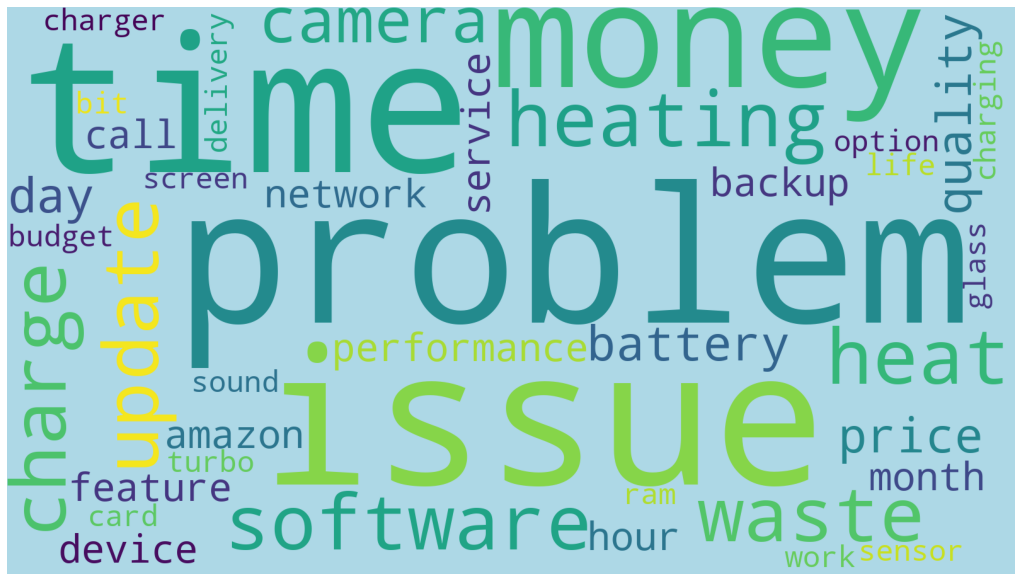

In [73]:
#plot the WordCloud image                      
plt.figure(figsize = (14, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()